## 2023-10-25 Meeting
Plots & Analysis for 2023_10_24 Meeting with Jonathan. following up on 2023_10_23_EXP_prev_violation_interactions.ipynb



In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys
import pickle
[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../../src/").iterdir()
    if folder.is_dir()
]

# from fitting_utils import create_violation_interaction_pairs
# from experiment_sigma_sweep import ExperimentSigmaSweep
# from multiclass_logistic_regression import MultiClassLogisticRegression
from model_visualizer import ModelVisualizer

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load in Experiments

TODO: need to get path stuff figured out! not working well

In [24]:
file_path = "../../data/results/"
experiment1_fname = "2023_10_23_prev_violation_interactions_stim_only.pkl"
experiment2_fname = "2023_10_23_prev_violation_interactions_stim_and_prev.pkl"

In [37]:
# open experiment pkls
with open(file_path + experiment1_fname, "rb") as f:
    experiment1 = pickle.load(f)
with open(file_path + experiment2_fname, "rb") as f:
    experiment2 = pickle.load(f)

# init model vis
mv1 = ModelVisualizer(experiment1)
mv2 = ModelVisualizer(experiment2)

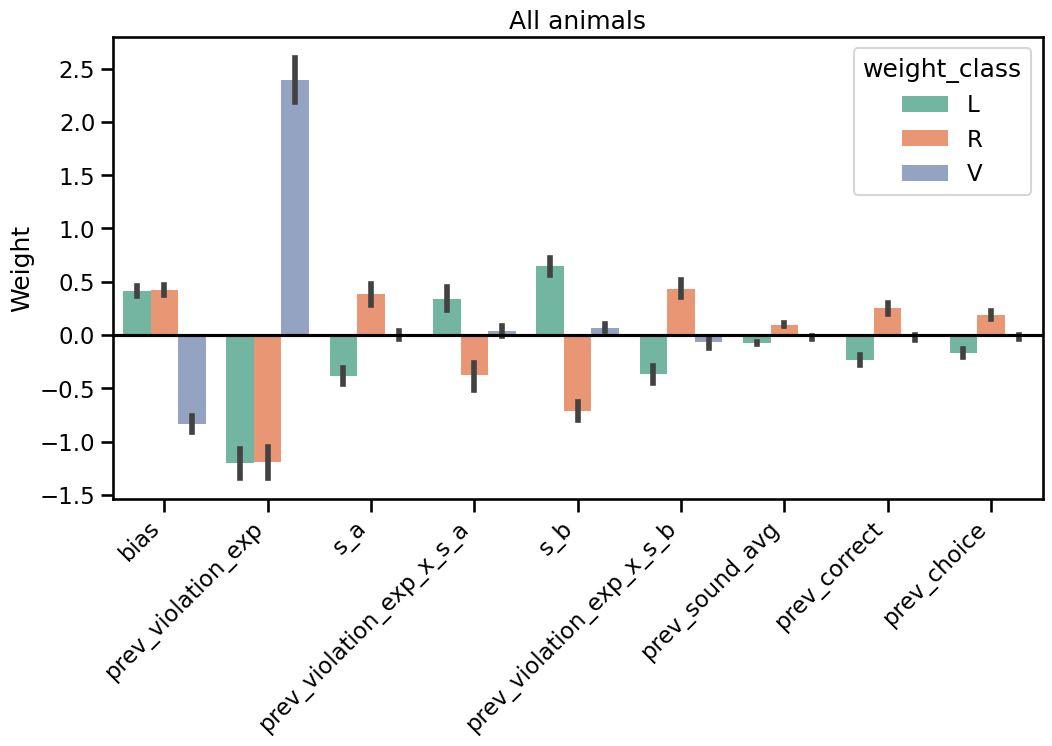

In [38]:
feature_order = [
    "bias",
    "prev_violation_exp",
    "s_a",
    "prev_violation_exp_x_s_a",
    "s_b",
    "prev_violation_exp_x_s_b",
    "prev_sound_avg",
    "prev_correct",
    "prev_choice",
]

palette = "Set2"
mv1.plot_weights_summary(palette=palette, order=feature_order)

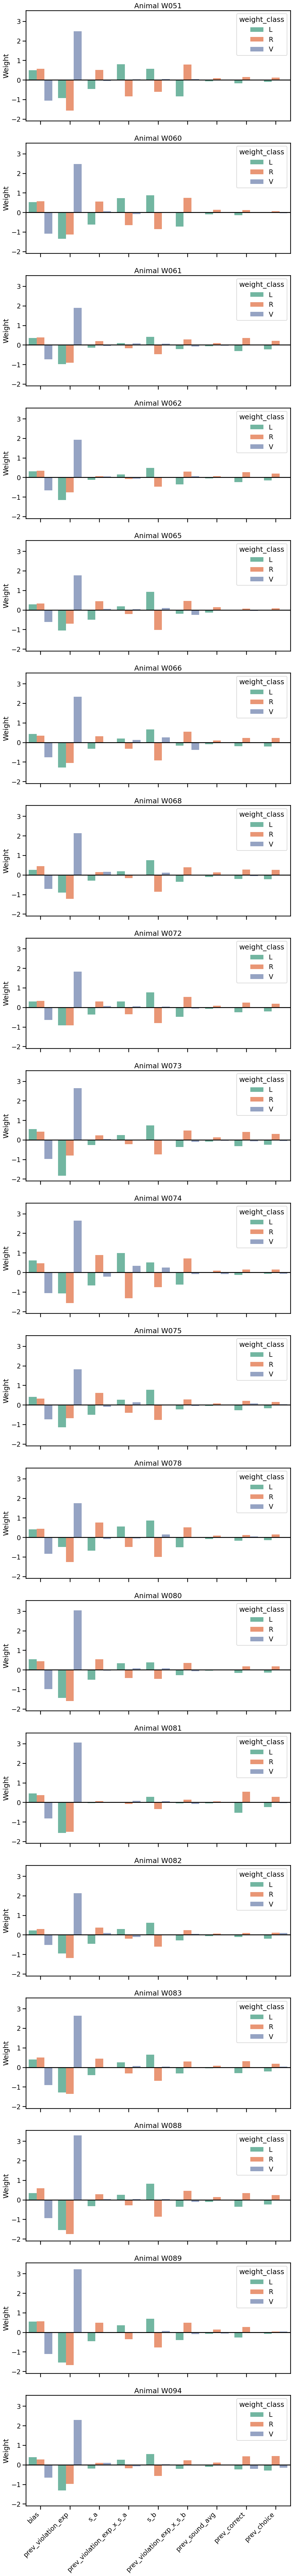

In [40]:
mv1.plot_weights_by_animal(
    palette=palette, order=feature_order
)  # w078 is a good example

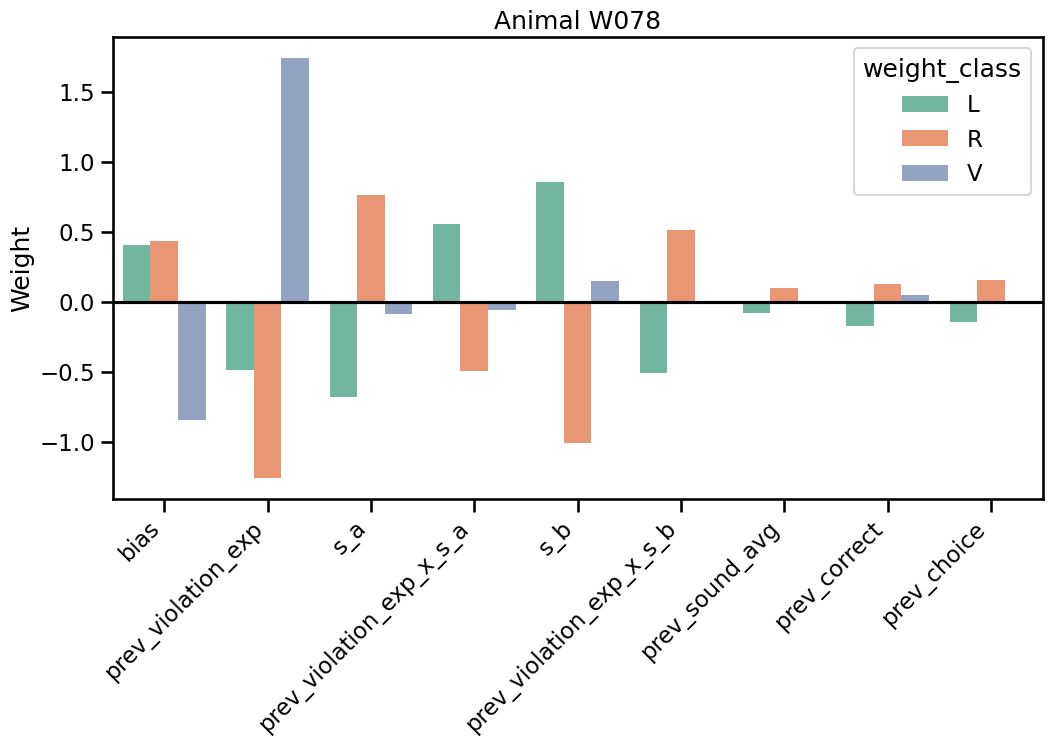

In [47]:
mv1.plot_weights_summary(animal_id="W078", palette=palette, order=feature_order)

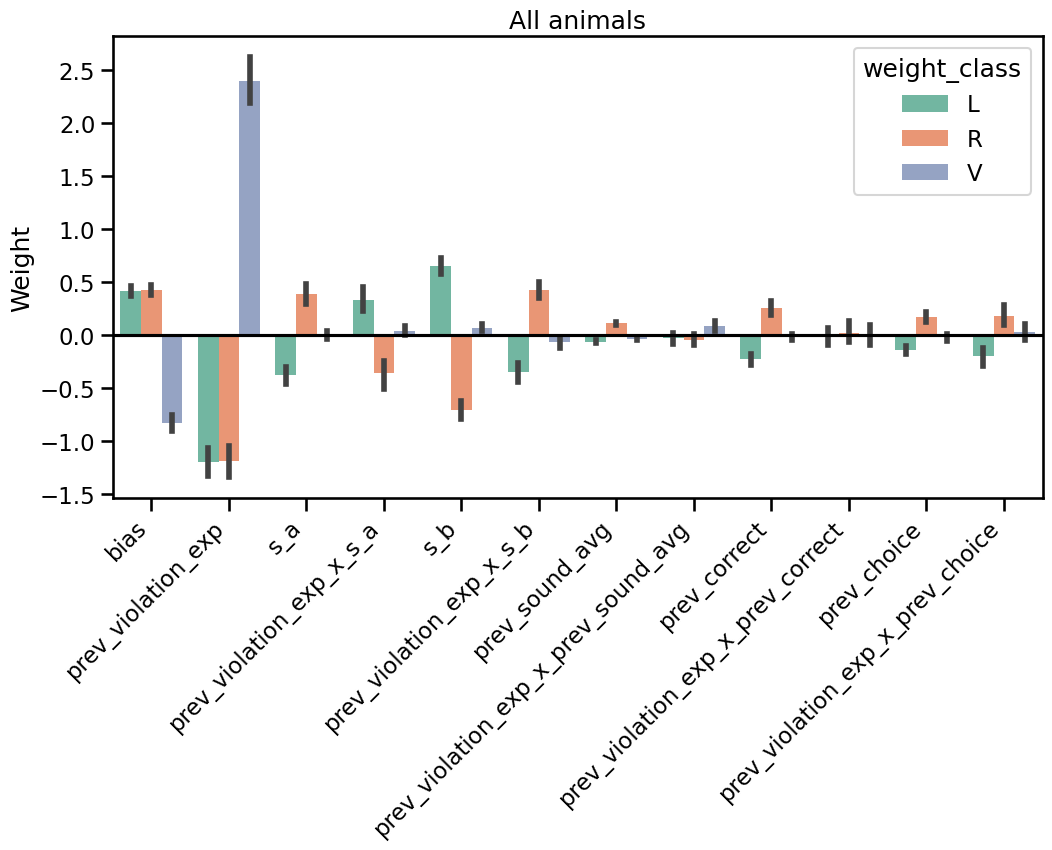

In [36]:
feature_order2 = [
    "bias",
    "prev_violation_exp",
    "s_a",
    "prev_violation_exp_x_s_a",
    "s_b",
    "prev_violation_exp_x_s_b",
    "prev_sound_avg",
    "prev_violation_exp_x_prev_sound_avg",
    "prev_correct",
    "prev_violation_exp_x_prev_correct",
    "prev_choice",
    "prev_violation_exp_x_prev_choice",
]

palette = "Set2"
mv2.plot_weights_summary(palette=palette, order=feature_order2)

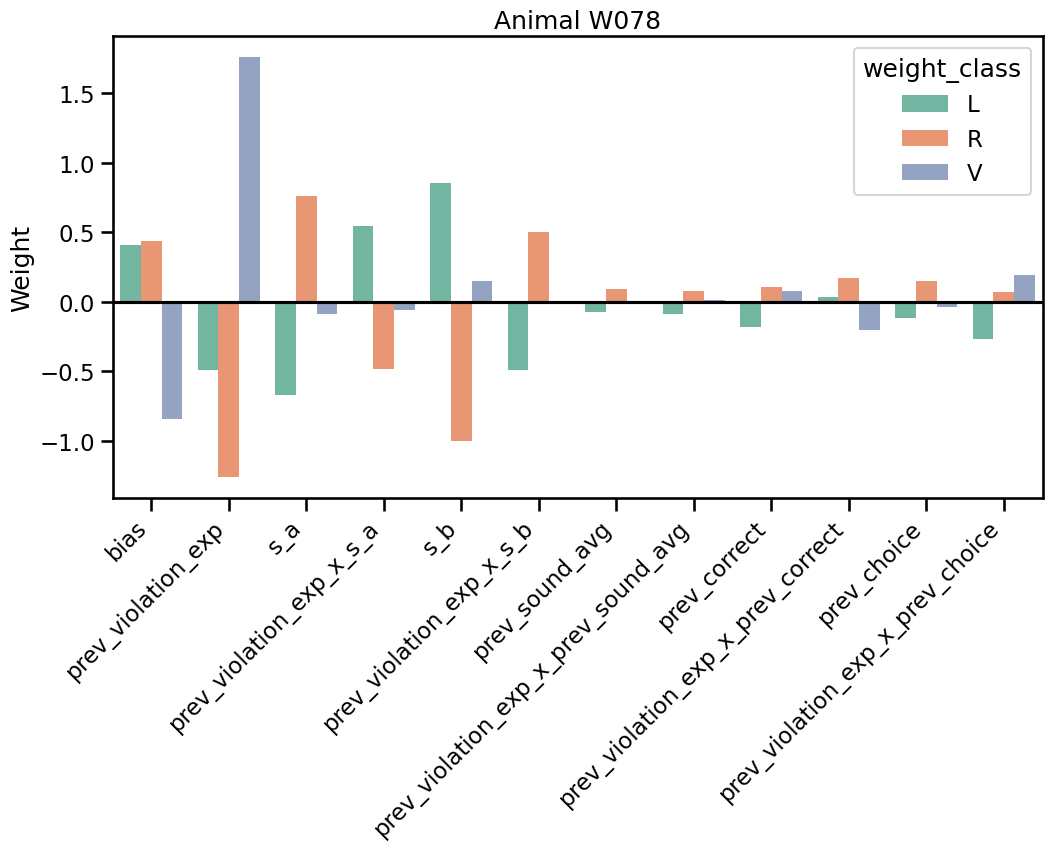

In [49]:
mv2.plot_weights_summary(animal_id="W078", palette=palette, order=feature_order2)

## Performance on t-1 violation vs t-1 not violation

Carlos brought up in the tcm meeting this simple plot of two axis where each point is an animal to see if hit rate differs after a violation.

In [51]:
from get_rat_data import get_rat_viol_data

In [133]:
vdf = get_rat_viol_data().query("training_stage > 2")

returning viol dataset for all animals


In [134]:
def calculate_prev_violation(group):
    session_boundaries_mask = group["session"].diff() == 0
    group["prev_violation"] = (
        group["violation"].shift() * session_boundaries_mask
    ).fillna(0)
    return group


# Grouping by 'animal_id' and then applying the function to calculate 'prev_violation'
vdf = vdf.groupby("animal_id").apply(calculate_prev_violation).reset_index(drop=True)

In [135]:
viol_hit_rates = vdf.groupby(["animal_id", "prev_violation"]).hit.mean().reset_index()

hit_rates = viol_hit_rates.rename(columns={"hit": "hit_rate"})

In [136]:
# Pivot the DataFrame to wide form
wide_hit_rates = hit_rates.pivot(
    index="animal_id", columns="prev_violation", values="hit_rate"
)

# Rename the columns for clarity
wide_hit_rates.columns = ["hit_rate_no_prev_viol", "hit_rate_with_prev_viol"]

wide_hit_rates.reset_index(inplace=True)

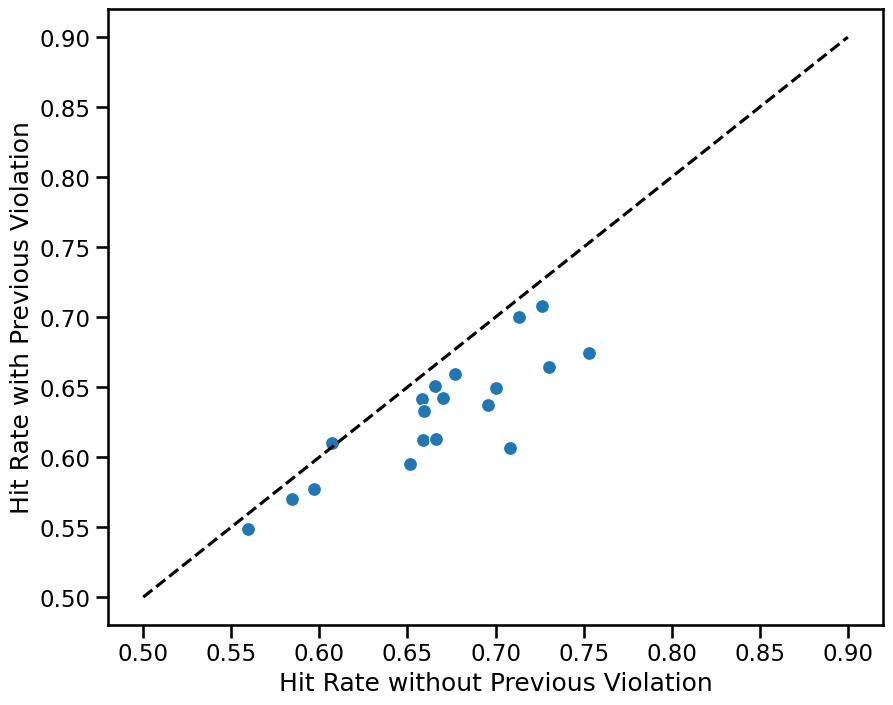

In [137]:
limits = (0.5, 0.9)
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=wide_hit_rates, x="hit_rate_no_prev_viol", y="hit_rate_with_prev_viol", s=100
)

plt.plot(limits, limits, "k--", label="Unity Line")

plt.xlabel("Hit Rate without Previous Violation")
plt.ylabel("Hit Rate with Previous Violation")

plt.show()

Text(0, 0.5, 'Hit Rate with Previous Violation')

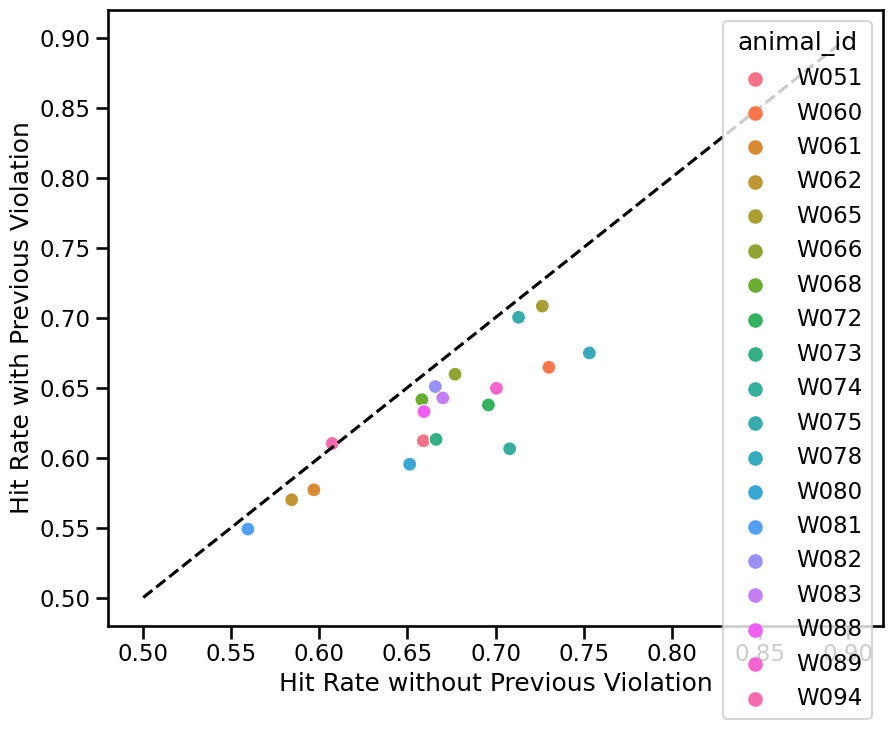

In [138]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=wide_hit_rates,
    x="hit_rate_no_prev_viol",
    y="hit_rate_with_prev_viol",
    hue="animal_id",
    s=100,
)

plt.plot(limits, limits, "k--", label="Unity Line")

plt.xlabel("Hit Rate without Previous Violation")
plt.ylabel("Hit Rate with Previous Violation")

In [139]:
from fitting_utils import get_taus_df

tau_df = get_taus_df()
merged_hit_tau = pd.merge(tau_df, wide_hit_rates, on="animal_id", how="outer")

Text(0, 0.5, 'Hit Rate with Previous Violation')

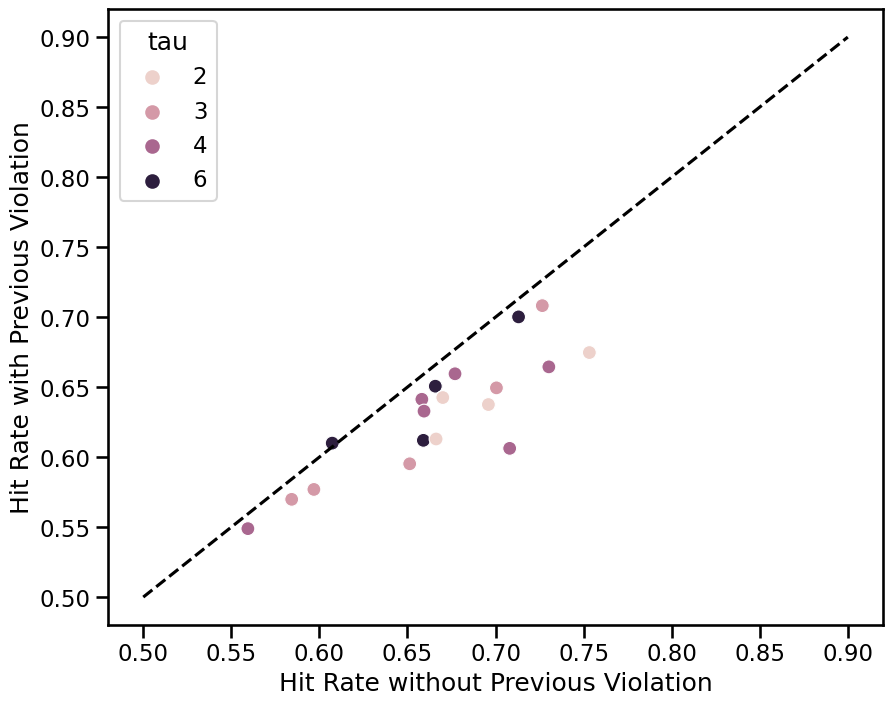

In [140]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=merged_hit_tau,
    x="hit_rate_no_prev_viol",
    y="hit_rate_with_prev_viol",
    hue="tau",
    s=100,
)

plt.plot(limits, limits, "k--", label="Unity Line")

plt.xlabel("Hit Rate without Previous Violation")
plt.ylabel("Hit Rate with Previous Violation")